In [1]:
#import modules needed
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [2]:
#import cleaned data
ski_data = pd.read_csv('../clean_data/ski_data_cleaned.csv')

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [4]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [5]:
#State-wide summary data
state_summary = pd.read_csv('../clean_data/state_summary.csv')

In [6]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      35 non-null     object 
 1   resorts_per_state          35 non-null     int64  
 2   state_total_skiable_area   35 non-null     float64
 3   state_total_days_open      35 non-null     float64
 4   state_total_terrain_parks  35 non-null     float64
 5   state_total_night_skiing   35 non-null     float64
 6   state_pop                  35 non-null     int64  
 7   state_area_sq_miles        35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [7]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,state_pop,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


# Top State by Order of Each Summary Stat

In [8]:
state_summary_newind = state_summary.set_index('state')

In [9]:
#total state area
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head(10)

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Nevada        110572
Colorado      104094
Oregon         98379
Wyoming        97813
Michigan       96714
Name: state_area_sq_miles, dtype: int64

In [10]:
#Montana is 3rd largest state by area

In [11]:
#total state population
state_summary_newind.state_pop.sort_values(ascending=False).head(10)

state
California        39512223
New York          19453561
Pennsylvania      12801989
Illinois          12671821
Ohio              11689100
North Carolina    10488084
Michigan           9986857
New Jersey         8882190
Virginia           8535519
Washington         7614893
Name: state_pop, dtype: int64

In [12]:
#Montana is not in the top ten most populous states, it is less densely populated

In [13]:
#Resorts per state
state_summary_newind.resorts_per_state.sort_values(ascending=False).head(10)

state
New York         33
Michigan         28
Colorado         22
California       21
Pennsylvania     19
New Hampshire    16
Vermont          15
Wisconsin        15
Minnesota        14
Utah             13
Name: resorts_per_state, dtype: int64

In [14]:
#New York has the most followed by Michigan, is this proximity to wealth or just geography?

In [15]:
#total skiable area
state_summary_newind.state_total_skiable_area.sort_values(ascending=False).head(10)

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Washington    15330.0
Oregon        11774.0
Vermont        7239.0
Wyoming        6523.0
New York       5514.0
Name: state_total_skiable_area, dtype: float64

In [16]:
#Montana comes in 4th for total skiable area, it may have fewer but larger resorts. CO is top for both area and resorts

In [17]:
#total night skiing
state_summary_newind.state_total_night_skiing.sort_values(ascending=False).head(10)

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Wisconsin       1065.0
Minnesota       1020.0
Montana          710.0
Utah             642.0
California       587.0
Name: state_total_night_skiing, dtype: float64

In [18]:
#NY has the highest amount of night skiing area, the top 5 are all northern most states (in fact the top 8 are)
#is this simply trying to extend the day due to shorter days? Is NY domination due to trying to extend the day due to 
#shorter visits for travelers traveling shorter distances

In [19]:
#total days open
state_summary_newind.state_total_days_open.sort_values(ascending=False).head(10)

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Vermont          1777.0
Utah             1544.0
Wisconsin        1519.0
Minnesota        1490.0
Pennsylvania     1404.0
Name: state_total_days_open, dtype: float64

In [20]:
#Resort density
#100k scaling for looking at magnitude of the data
state_summary['resorts_per_100kcapita']= 100_000 * state_summary.resorts_per_state / state_summary.state_pop
state_summary['resorts_per_100ksq_mile']= 100_000 * state_summary.resorts_per_state/ state_summary.state_area_sq_miles
state_summary.drop(columns=['state_pop', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


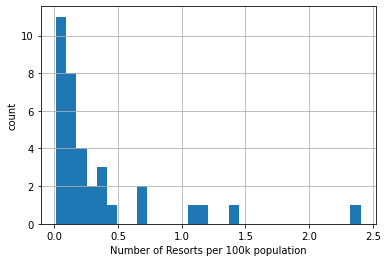

In [21]:
#distribution of new features
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of Resorts per 100k population')
plt.ylabel('count');

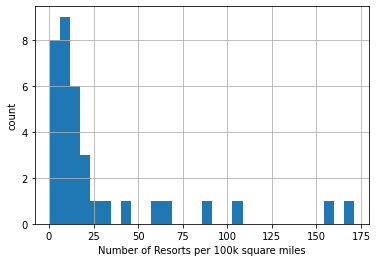

In [22]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel("Number of Resorts per 100k square miles")
plt.ylabel('count');

In [23]:
#top states by resort density
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [24]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

In [25]:
#visualizing HD Data
#scale data
state_summary_scale = state_summary.set_index('state')
#save state labels
state_summary_index = state_summary_scale.index
#save column names
state_summary_columns = state_summary_scale.columns

state_summary_scale.head()

,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [26]:
state_summary_scale = scale(state_summary_scale)


In [27]:
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


In [28]:
#verify scaling
state_summary_scaled_df.mean()

resorts_per_state           -6.344132e-17
state_total_skiable_area    -5.432163e-17
state_total_days_open        9.754102e-17
state_total_terrain_parks    4.282289e-17
state_total_night_skiing     6.344132e-17
resorts_per_100kcapita       5.075305e-17
resorts_per_100ksq_mile      5.075305e-17
dtype: float64

In [29]:
state_summary_scaled_df.std()

resorts_per_state            1.014599
state_total_skiable_area     1.014599
state_total_days_open        1.014599
state_total_terrain_parks    1.014599
state_total_night_skiing     1.014599
resorts_per_100kcapita       1.014599
resorts_per_100ksq_mile      1.014599
dtype: float64

In [30]:
state_summary_scaled_df.std(ddof=0)

resorts_per_state            1.0
state_total_skiable_area     1.0
state_total_days_open        1.0
state_total_terrain_parks    1.0
state_total_night_skiing     1.0
resorts_per_100kcapita       1.0
resorts_per_100ksq_mile      1.0
dtype: float64

In [31]:
#calculate PCA transformation
state_pca = PCA().fit(state_summary_scale)


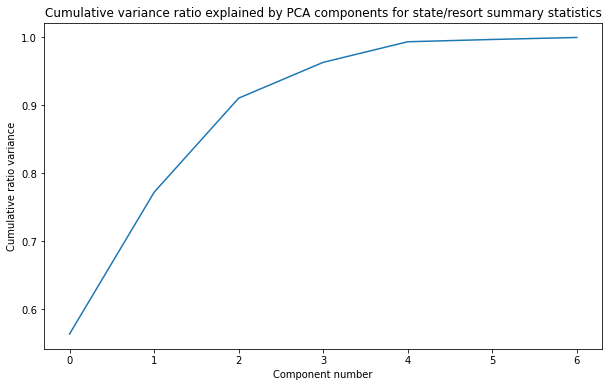

In [32]:
plt.subplots(figsize=(10,6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component number')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [33]:
#first 2 components account for > 75% of variance and first 4 account for more than 95%


In [34]:
#transform state_pca with state_summary_scale as argument
state_pca_x = state_pca.transform(state_summary_scale)

In [35]:
state_pca_x.shape

(35, 7)

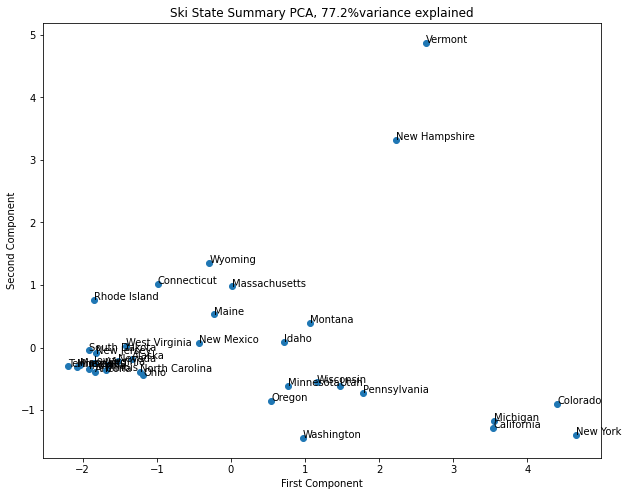

In [36]:
#plot the first 2 derived features and label with state name
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title(f'Ski State Summary PCA, {pc_var:.1f}%variance explained')
for s,x,y in zip(state,x,y):
    plt.annotate(s,(x,y))

In [37]:
#Average Ticket Price by State
#calculate average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

Text(0, 0.5, 'count')

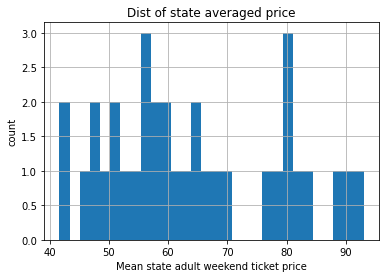

In [38]:
state_avg_price.hist(bins=30)
plt.title('Dist of state averaged price')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count')

In [39]:
#create a df with the values of the first 2 PCA components
pca_df = pd.DataFrame({'PC1':state_pca_x[:,0], 'PC2':state_pca_x[:,1]}, index= state_summary_index)
pca_df.head()


,PC1,PC2
state,,
Alaska,-1.336533,-0.182208
Arizona,-1.839049,-0.387959
California,3.537857,-1.282509
Colorado,4.402210,-0.898855
Connecticut,-0.988027,1.020218


In [40]:
state_avg_price.head()


state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [41]:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [42]:
#pd.concat the two df along axis 1
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()


,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.336533,-0.182208,57.333333
Arizona,-1.839049,-0.387959,83.500000
California,3.537857,-1.282509,81.416667
Colorado,4.402210,-0.898855,90.714286
Connecticut,-0.988027,1.020218,56.800000


In [43]:
#separate values into quartiles
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision =1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.336533,-0.182208,57.333333,"(53.1, 60.4]"
Arizona,-1.839049,-0.387959,83.500000,"(78.4, 93.0]"
California,3.537857,-1.282509,81.416667,"(78.4, 93.0]"
Colorado,4.402210,-0.898855,90.714286,"(78.4, 93.0]"
Connecticut,-0.988027,1.020218,56.800000,"(53.1, 60.4]"


In [44]:
#double check the df
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.843646,0.761339,NaN,NaN


In [45]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile']=pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace =True)
pca_df.loc['Rhode Island']

PC1             -1.843646
PC2              0.761339
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

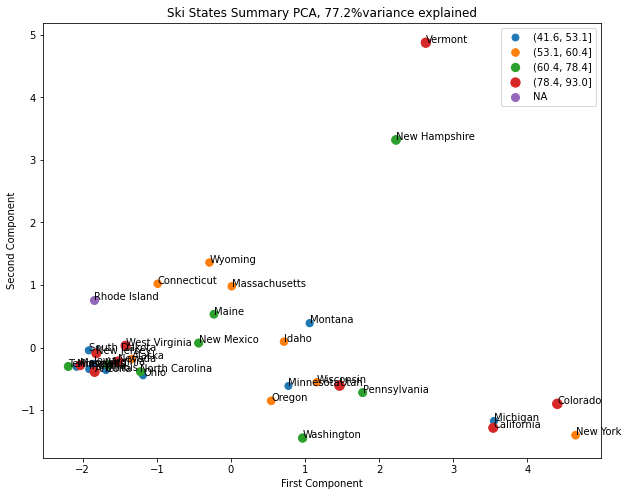

In [46]:
x = pca_df.PC1
y = pca_df.PC2
price =  pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pca_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize = (10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.legend()
ax.set_title(f'Ski States Summary PCA, {pca_var:.1f}%variance explained')
for s,x,y in zip(state,x,y):
    plt.annotate(s,(x,y))

In [47]:
#no distinguishable pattern for price

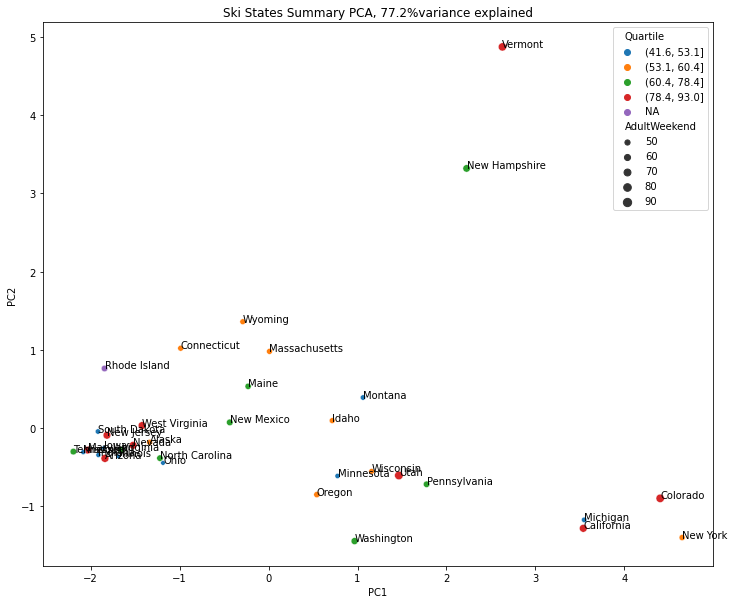

In [48]:
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12,10))
sns.scatterplot(x=x, y=y, size='AdultWeekend', hue='Quartile', hue_order=pca_df.Quartile.cat.categories, data=pca_df)
for s,x,y in zip(state, x, y):
    plt.annotate(s,(x,y))
plt.title(f'Ski States Summary PCA, {pca_var:.1f}%variance explained');

In [49]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.486079,0.318224,0.489997,0.488420,0.334398,0.187154,0.192250
1,-0.085092,-0.142204,-0.045071,-0.041939,-0.351064,0.662458,0.637691
2,-0.177937,0.714835,0.115200,0.005509,-0.511255,0.220359,-0.366207
3,0.056163,-0.118347,-0.162625,-0.177072,0.438912,0.685417,-0.512443
4,-0.209186,0.573462,-0.250521,-0.388608,0.499801,-0.065077,0.399461
5,-0.818390,-0.092319,0.238198,0.448118,0.246196,0.058911,-0.009146
6,-0.090273,-0.127021,0.773728,-0.613576,0.022185,-0.007887,-0.005631


In [50]:
                           state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T                                                                                                                   

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_night_skiing,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [51]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_night_skiing,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


In [52]:
#Vermont and NH have large values for resorts_per_100ksq_mile and Vermont has a LARGE value for resorts_per_100kcapita


In [53]:
#with no clear groupings all states can be treated equally and build a pricing model that considers all the states together

In [54]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [55]:
#feature engineering
state_summary.head()


,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [56]:
ski_data = ski_data.merge(state_summary, how='left', on='state')

In [57]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [58]:
#resort competition features
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resorts_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_night_skiing

ski_data.drop(columns = ['state_total_skiable_area', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_night_skiing'], inplace=True)

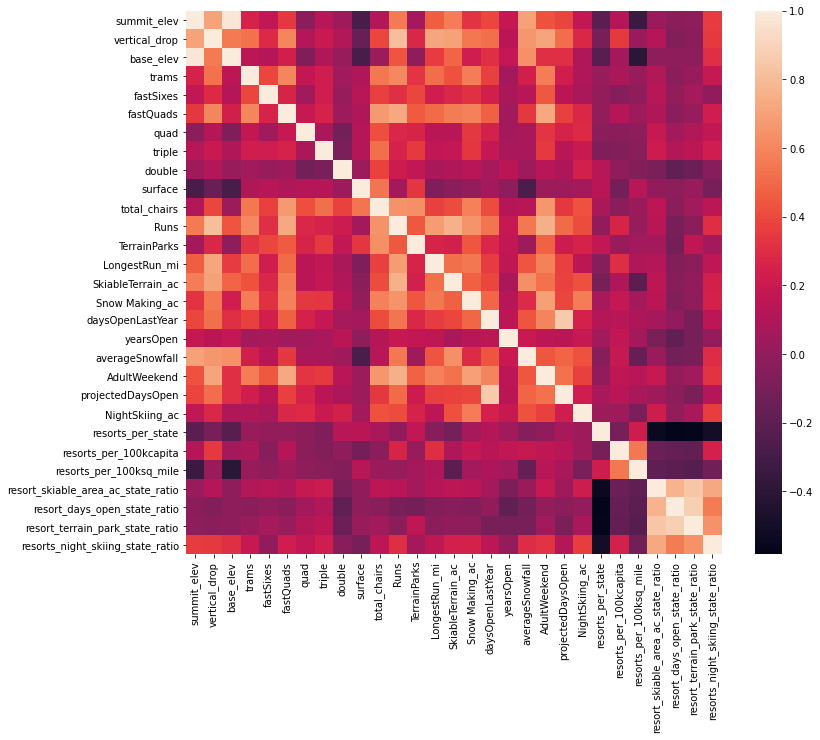

In [59]:
#feature correlation heatmap
plt.subplots(figsize = (12,10))
sns.heatmap(ski_data.corr());

In [60]:
# summit_elev and base_elev highly correlated
#AdultWeekend ticket prices have high correlation with vertical_drop, quad, Runs, Snow_making_ac, total_chairs and of the 
#state_ratio features night_skiing has the highest correlation


In [61]:
#define function for creating scatterplots of ticket price vs desired columns
def scatterplots(columns, ncol=None, figsize=(15,8)):
    if ncol is None:
        ncol=len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize = figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col, y='AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket Price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

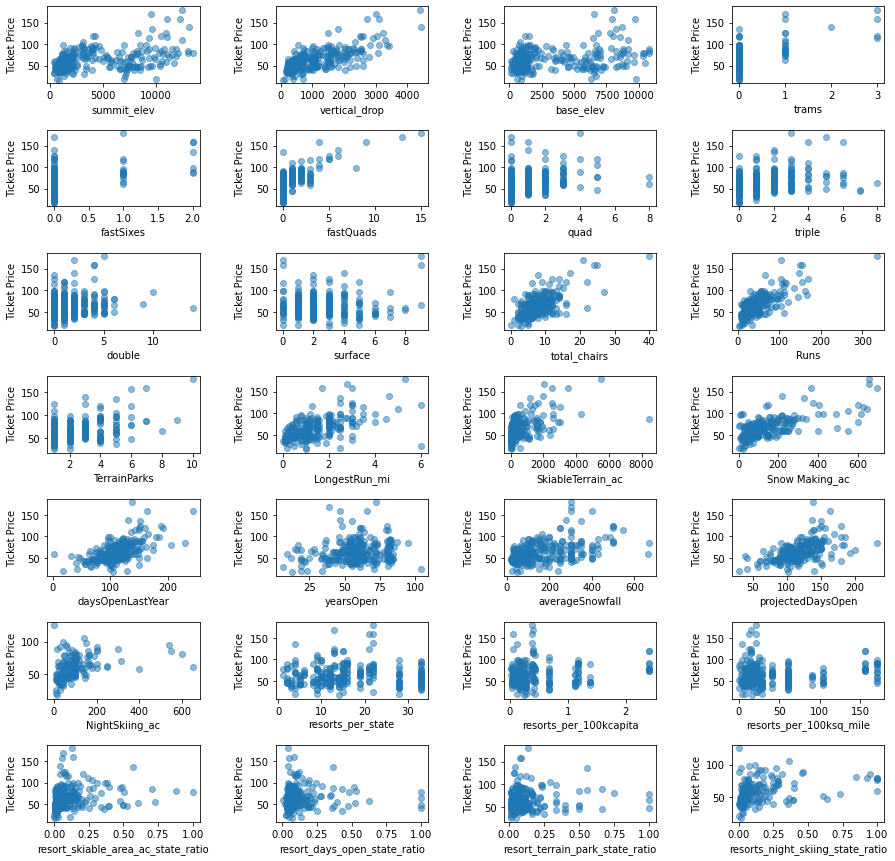

In [62]:
#Use list comprehension to build list of features from the columns of ski_data 
features = [col for col in ski_data.columns if col not in ['Name', 'Region', 'state', 'AdultWeekend']]
scatterplots(features, ncol=4, figsize=(15, 15))

In [63]:
#strong positive correlations with vertical_drop, total_chairs, Runs. fast_quads could be useful, resorts_per_100kcapita
#is interesting in that lower values give higher possibility of higher ticket price with a lot of variability not seen at
#higher values

In [64]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

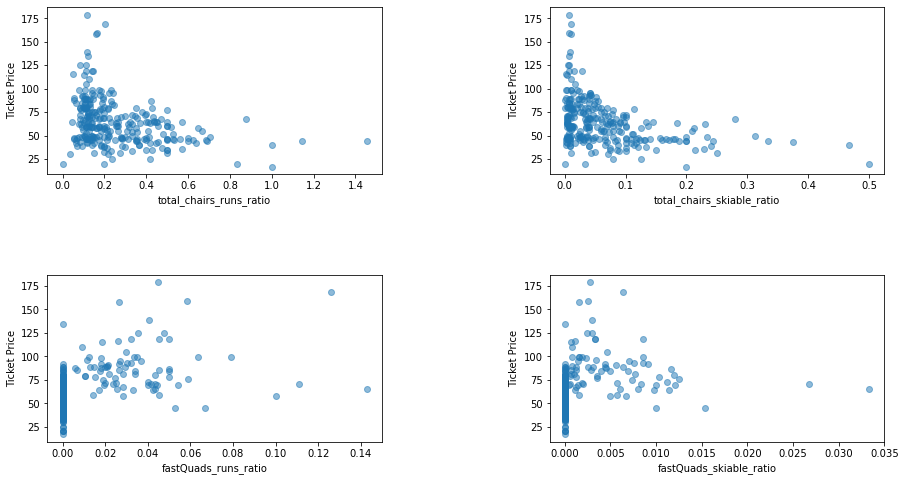

In [65]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

In [66]:
#Summary--
#According to total state area Montana is the 3rd largest but not densely populated (not in the top ten most pop)
#Montana is also not in the top ten for resorts_per_state, New York and Michigan are 1st and 2nd
#Montana is 4th for most skiable area
#the top 5 states for skiable area are all northern most continental states, New York is 1st with approx +1000 more
#Montana is not in the top 10 for daysOpen 
#with no clear groupings in the Ski States Summary PCA plot all states can be treated equally
#according to the heat map and subsequent scatterplots, the strongest positve correlations are with AdultWeekend and the following components: 
#vertical_drop, total_chairs, Runs. Fast_quads also holds some useful information.
#would be helpful to have visitors per year to compare number of vistors to ticket price due to the ratios
#in total_chairs and fast_quads to Runs and skiable_area

In [67]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [68]:
# Save the data 
datapath = '../clean_data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../clean_data/ski_data_step3_features.csv"
